In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
data = pd.read_csv('../3.stats/data/assembly.dat',delimiter='\t',skiprows=11,names=['s','usec','ax','ay','az','gx','gy','gz','mx','my','mz','label'])

In [ ]:
#simple line plot
plt.plot(data['ax'])

In [ ]:
#simple line plot
plt.plot(data['ax'])
plt.xlim(4000,7000)

Try to seperate the 3rd actvitiy (sandpapering) using the xlim and ylim command

In [ ]:
fig= plt.figure()
plt.plot(data['ax'], label='acceleration x')
plt.plot(data['gx'], label='gyrscope x')
pylab.legend(loc='upper right')

to save a figure use:

In [ ]:
fig.savefig("test.png")

In [ ]:
fig = plt.figure()
plt.plot(data['gx'], 'k.')
plt.xlim(4000,7000)

fig = plt.figure()
plt.plot(data['gx'], 'k:')
plt.xlim(4000,7000)

for more details on plotting options see also: http://matplotlib.org/users/pyplot_tutorial.html

We can change the size and DPI as follows:

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=100)
plt.plot(data['gx'], 'k-')

#Histograms

In [ ]:
#to explore the hist command a bit more ... use this list
alist =[1,2,3,4,5,5,5,4,4,4,4,4,4,5,6,4,4,4,4,4,4,4,4,3,2,2,8,8,8]
hist(alist)

In [ ]:
#if you want to plot the density function with it ... pandas is nice:
d = pd.Series(alist)
d.hist()
d.plot(kind='kde', style='k--')


#try it with the gryo and accelerometer data

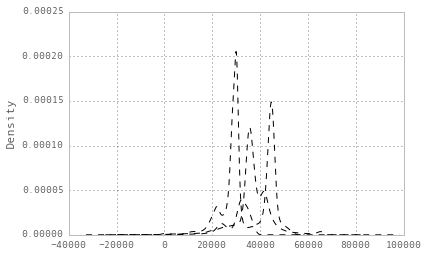

In [79]:
data['ax'].plot(kind='kde', style='k--')

data['ay'].plot(kind='kde', style='k--')
data['az'].plot(kind='kde', style='k--')

#Barcharts

In [ ]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue") 

In [ ]:
plt.barh(x, y, width, color="blue") 

#Workshop Scenario

Trying to build an activity recognition system for several workshop activities.


##Hypthesis 
We can distinguish hammering, screwdriving, sandpapering and sawing, using a wirst worne accelerometer/gyroscope
(so far user dependent).

##Data Recording

The assembly.dat file contains a recording done from a assembly session.

A person was doing the following activities: 

* hammering in nails (label 1)
* screwdring (label 2)
* sandpapering (label 3)
* sawing (label 4)

Label 0 is for doing none of the activities above. The sensor is attached to the subjects right wrist (x axis pointing towards the fingers). 
The sensor was sampled with 100 Hz, it's raw sensor data (not calibrated). The data structure of the file is shown in the header of the file.

In [ ]:
accel_hammer = data[data['label']==1][['ax','ay','az']]
accel_hammer.plot()

In [ ]:
accel_hammer = data[data['label']==1][['ax','ay','az']]
accel_screw = data[data['label']==2][['ax','ay','az']]
accel_hammer.plot()
accel_screw.plot()

In [ ]:
accel_hammer = data[data['label']==1][['ax','ay','az']]
from pandas.stats.moments import rolling_apply

method = var
wsize = 50

accel_var_hammer = rolling_apply(accel_hammer, wsize, method).dropna()
accel_var_screw = rolling_apply(accel_screw, wsize, method).dropna()

scatter(accel_var_screw['ax'],accel_var_screw['ay'],color='blue')
scatter(accel_var_hammer['ax'],accel_var_hammer['ay'],color='red')



#3D Scatter Plots

In [57]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


In [ ]:
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection='3d')

ax.scatter(accel_var_screw['ax'],accel_var_screw['ay'],accel_var_screw['az'])
ax.scatter(accel_var_hammer['ax'],accel_var_hammer['ay'],accel_var_hammer['az'],c='red')
